#Mall Customer Segmentation using Machine Learning

##Library imports

In [19]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import pairwise_distances_argmin_min
from sklearn.manifold import TSNE


##Loading and Cleaning of Data

In [20]:
# Load the data
data = pd.read_csv("/content/sample_data/customer_data.csv")

# Drop unnecessary columns
data = data.drop(['CustomerID'], axis=1)

## Exploratory Data Analysis

In [21]:
# Explore data and handle outliers
q1 = data['Spending Score (1-100)'].quantile(0.99)
q2 = data['Annual Income (k$)'].quantile(0.99)
data = data[data['Spending Score (1-100)'] < q1]
data = data[data['Annual Income (k$)'] < q2]

# Encode categorical variables (Gender) with ordinal encoding
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

###Ploting Graphs for visualization

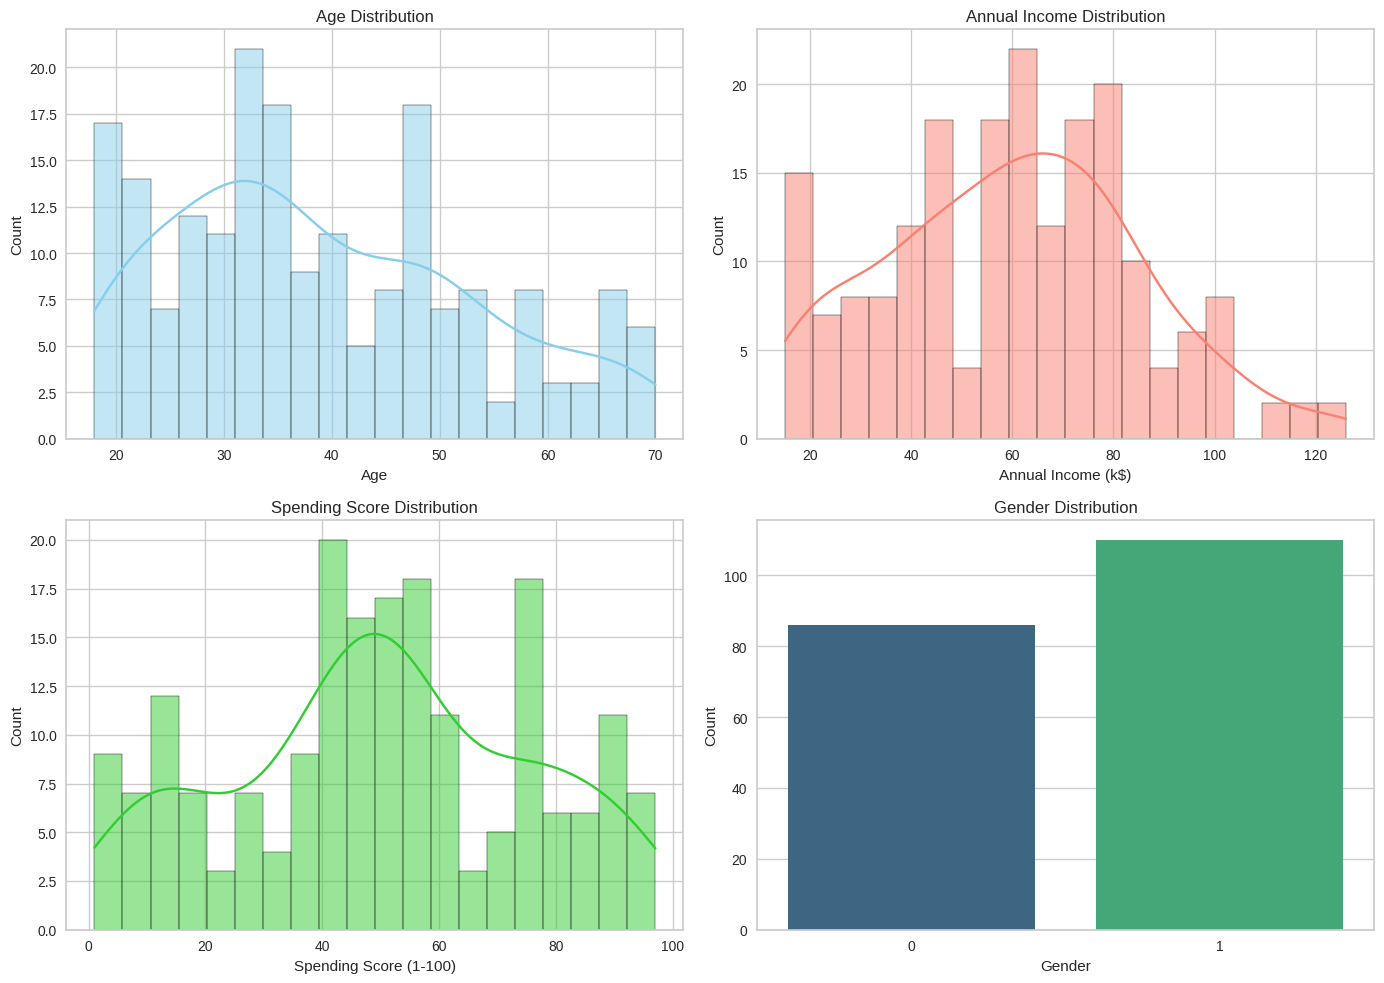

In [22]:
# ## Exploratory Data Analysis
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.histplot(data['Age'], kde=True, color='skyblue', bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(2, 2, 2)
sns.histplot(data['Annual Income (k$)'], kde=True, color='salmon', bins=20)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Count')

plt.subplot(2, 2, 3)
sns.histplot(data['Spending Score (1-100)'], kde=True, color='limegreen', bins=20)
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Count')

plt.subplot(2, 2, 4)
sns.countplot(x='Gender', data=data, palette='viridis')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

Pair Plots

<Figure size 2000x2000 with 0 Axes>

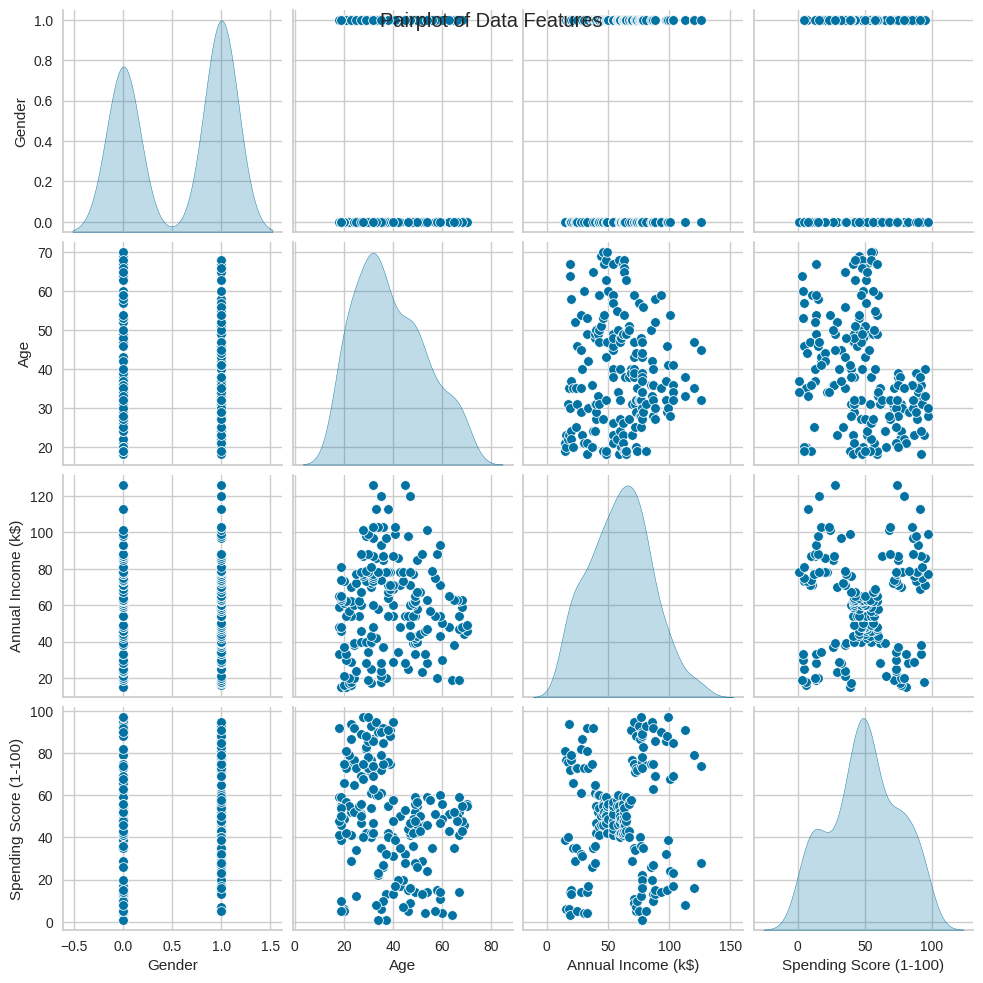

In [23]:
# Pairplot of features
plt.figure(figsize=(20, 20))
sns.pairplot(data, diag_kind='kde')
plt.suptitle('Pairplot of Data Features')
plt.show()

##Machine Laerning Using Kmeans Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

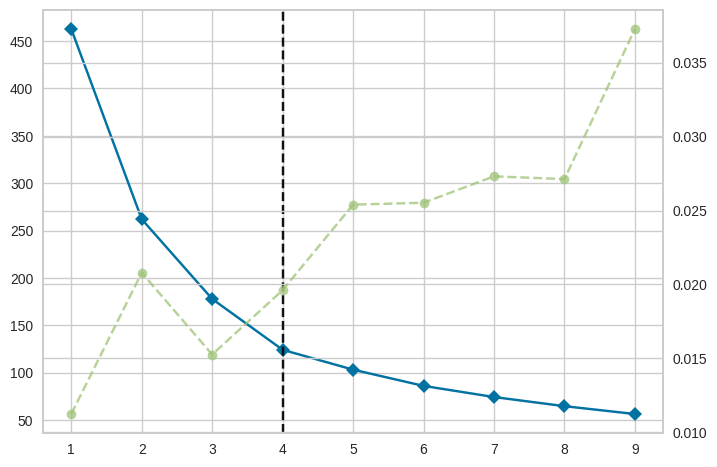

In [24]:
# Dimensionality reduction with PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Determine the number of clusters using the Elbow Method
visualizer = KElbowVisualizer(KMeans(), k=(1, 10))
visualizer.fit(pca_data)
optimal_k = visualizer.elbow_value_

In [25]:
# Fit K-Means clustering model with optimal K
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(pca_data)

# Add cluster labels to the original dataset
data['Cluster'] = cluster_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


###Visualizing Clusters

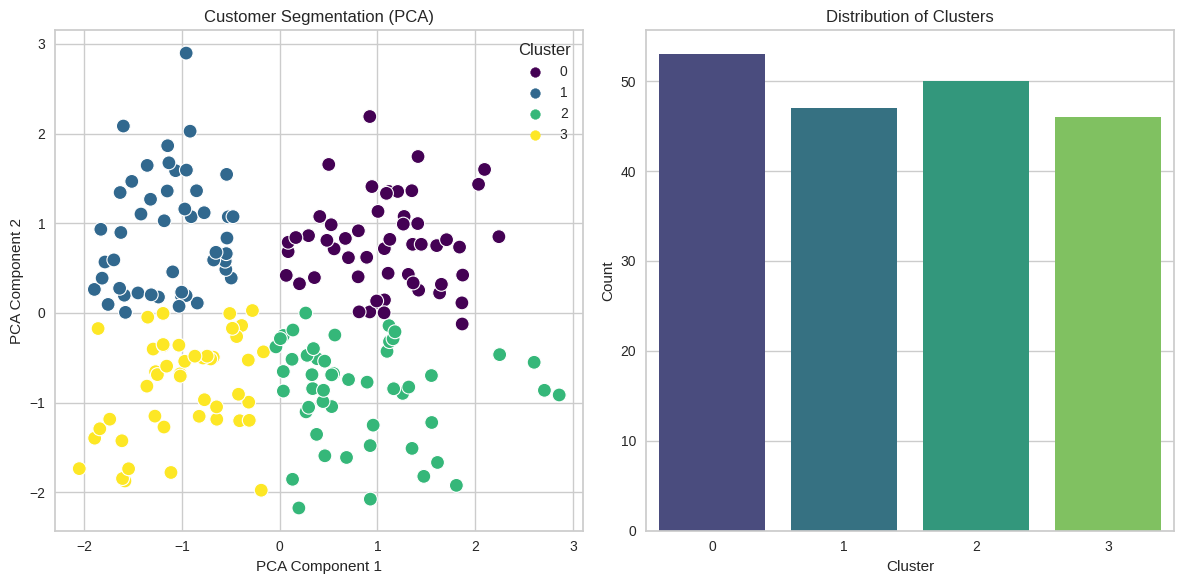

In [26]:
# Visualize the clusters in a scatterplot
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=data['Cluster'], palette='viridis', s=100)
plt.title('Customer Segmentation (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Checking the distribution of clusters
plt.subplot(1, 2, 2)
sns.countplot(x=data['Cluster'], palette='viridis')
plt.title('Distribution of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

Silhouette Score: 0.40


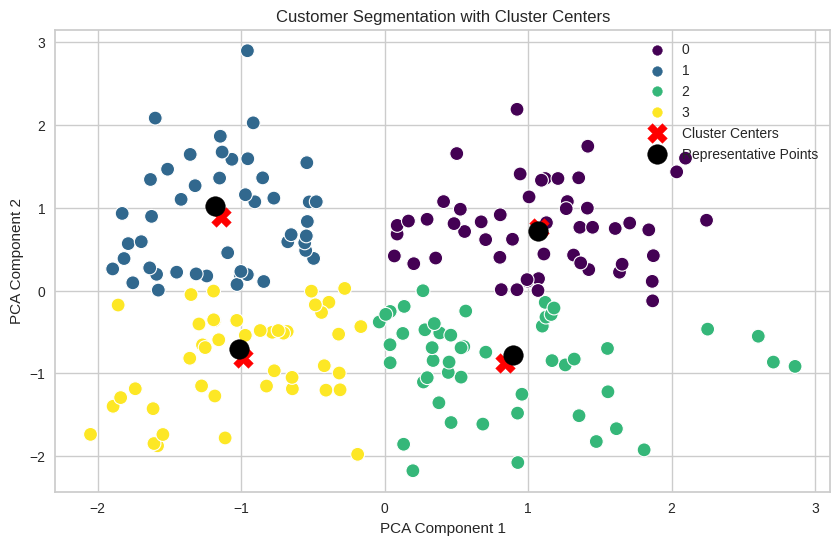

In [27]:
# Silhouette Score
silhouette_avg = silhouette_score(pca_data, cluster_labels)
print(f'Silhouette Score: {silhouette_avg:.2f}')

# Find the representative point in each cluster
cluster_centers = kmeans.cluster_centers_
closest_points, _ = pairwise_distances_argmin_min(cluster_centers, pca_data)

# Add representative points to the scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=data['Cluster'], palette='viridis', s=100)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.scatter(pca_data[closest_points, 0], pca_data[closest_points, 1], c='black', marker='o', s=200, label='Representative Points')
plt.title('Customer Segmentation with Cluster Centers')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

# t-SNE for further visualization
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_data = tsne.fit_transform(scaled_data)

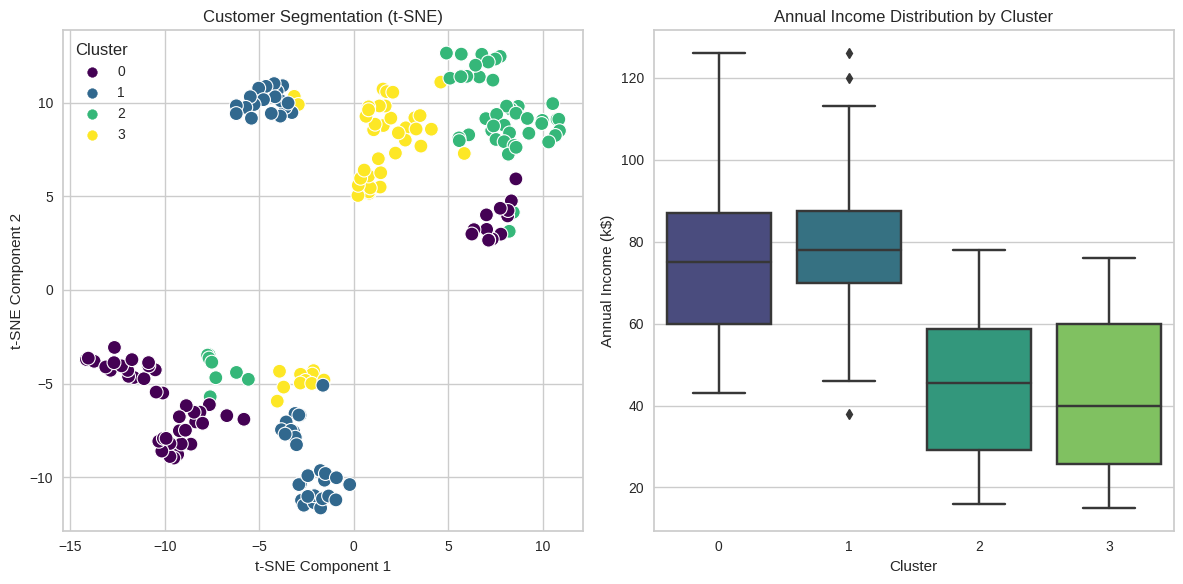

In [28]:
# Visualize data using t-SNE
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1], hue=data['Cluster'], palette='viridis', s=100)
plt.title('Customer Segmentation (t-SNE)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

# Visualize feature distributions by cluster
plt.subplot(1, 2, 2)
sns.boxplot(x='Cluster', y='Annual Income (k$)', data=data, palette='viridis')
plt.title('Annual Income Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Annual Income (k$)')

plt.tight_layout()
plt.show()

In [29]:
# Print cluster characteristics
cluster_characteristics = data.groupby('Cluster').agg({
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean',
    'Gender': 'mean'
}).reset_index()

cluster_characteristics.columns = ['Cluster', 'Avg Age', 'Avg Annual Income (k$)', 'Avg Spending Score', 'Avg Gender']

print(cluster_characteristics)

   Cluster    Avg Age  Avg Annual Income (k$)  Avg Spending Score  Avg Gender
0        0  48.188679               74.339623           30.113208    0.245283
1        1  30.276596               78.787234           76.382979    0.404255
2        2  49.420000               44.160000           35.120000    0.840000
3        3  25.869565               42.282609           60.869565    0.782609


##Additional Data Analysis

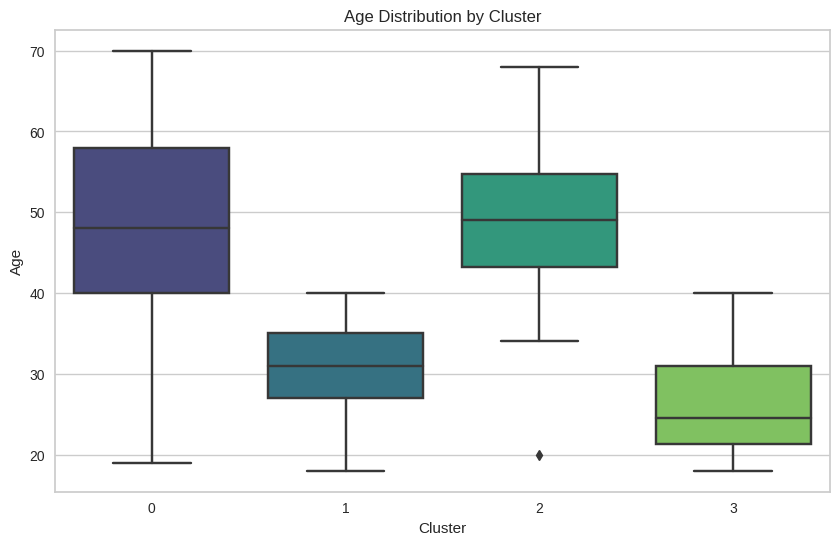

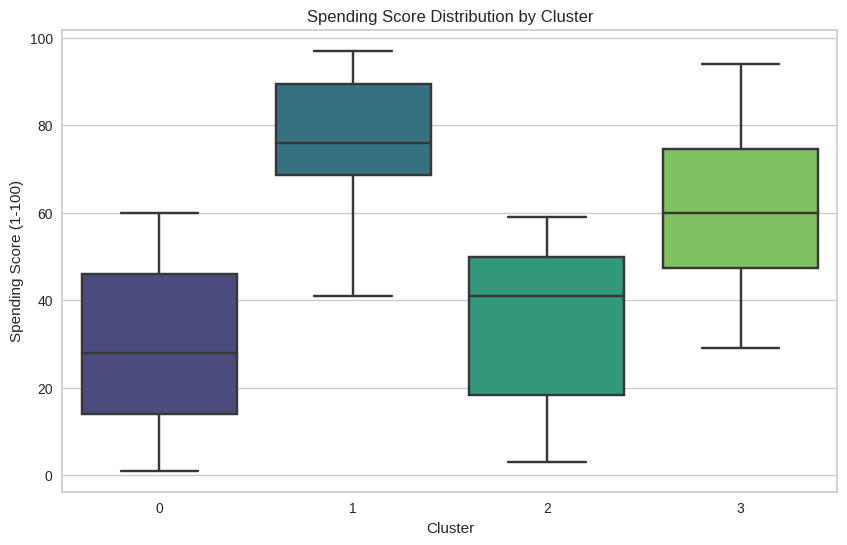

In [30]:
# Additional Data Analysis
# Visualize Age distribution by cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Age', data=data, palette='viridis')
plt.title('Age Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.show()

# Visualize Spending Score distribution by cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=data, palette='viridis')
plt.title('Spending Score Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Spending Score (1-100)')
plt.show()

##Conclusion and Target Customer Segments



Ater analyzing the customer segmentation and characteristics of each cluster, we can draw the following conclusions:

**Cluster 0:**
*   Moderate Annual Income
*   Low Spending Score
*   Potential target: Customers who might spend more with appropriate incentives.

**Cluster 1:**
*   High Annual Income
*   High Spending Score
*   Potential target: High-income, high-spending customers.

**Cluster 2:**
*   Low Annual Income
*   Low Spending Score
*   Potential target: Customers who may need lower-priced products or promotions.

**Cluster 3:**
*   Moderate Annual Income
*   Moderate Spending Score
*   Potential target: Customers with moderate spending habits.

The Silhouette Score indicates a reasonable clustering quality, with higher values indicating better-defined clusters.

Additional data analysis reveals age and spending score distributions, which can help tailor marketing strategies.

**Marketing Strategy:**
*   Target Cluster 1, which consists of high-income, high-spending customers, with premium products and personalized offers.
*   Focus on Cluster 0, which has moderate income but low spending. Encourage spending with discounts or loyalty programs.
*   Consider Cluster 3 for general marketing campaigns due to their moderate spending habits.
*   Monitor Cluster 2 for opportunities to attract customers with lower-priced products or promotions.

This comprehensive analysis provides valuable insights for marketing strategies and targeting specific customer segments.